In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
from nltk.corpus import stopwords
from sklearn.neighbors import NearestNeighbors
import re

%matplotlib inline

In [3]:
df = pd.read_csv('data/priceline_reviews.csv')
df.head()

Title  Image  \
0  Allison of Chula Vista, CA    5.0   
1      Angela of Mitchell, NE    NaN   
2      Rich of Warrington, PA    5.0   
3        Heidi of Mosinee, WI    NaN   
4     Howard of Las Vegas, NV    5.0   

                                      rvwaut__infver    catxtcpt  \
0  \n                    Verified Reviewer\n     ...  2021/08/09   
1  \n                    Verified Reviewer\n     ...  2021/08/06   
2  \n                    Verified Reviewer\n     ...  2021/05/04   
3  \n                    Verified Reviewer\n     ...  2021/04/23   
4  \n                    Verified Reviewer\n     ...  2021/01/05   

                                               rvwbd  
0  I had a last minute business trip from San Die...  
1  Had an issue with a car rental that we reserve...  
2  I tried the multitude of travel places looking...  
3  We rented a car through Priceline on a recent ...  
4  I have found Priceline to be a good company. T...

In [4]:
# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head
df.head()

Title  Image  \
0  Allison of Chula Vista, CA    5.0   
1      Angela of Mitchell, NE    NaN   
2      Rich of Warrington, PA    5.0   
3        Heidi of Mosinee, WI    NaN   
4     Howard of Las Vegas, NV    5.0   

                                      rvwaut__infver    catxtcpt  \
0  \n                    Verified Reviewer\n     ...  2021/08/09   
1  \n                    Verified Reviewer\n     ...  2021/08/06   
2  \n                    Verified Reviewer\n     ...  2021/05/04   
3  \n                    Verified Reviewer\n     ...  2021/04/23   
4  \n                    Verified Reviewer\n     ...  2021/01/05   

                                               rvwbd  
0  I had a last minute business trip from San Die...  
1  Had an issue with a car rental that we reserve...  
2  I tried the multitude of travel places looking...  
3  We rented a car through Priceline on a recent ...  
4  I have found Priceline to be a good company. T...

In [6]:
df['rating'] = df['Image']
df['date'] = df['catxtcpt']
df['review'] = df['rvwbd']

In [7]:
df.drop(columns=['rvwbd', 'Image', 'catxtcpt'],inplace=True)
df.head()

Title  \
0  Allison of Chula Vista, CA   
1      Angela of Mitchell, NE   
2      Rich of Warrington, PA   
3        Heidi of Mosinee, WI   
4     Howard of Las Vegas, NV   

                                      rvwaut__infver  rating        date  \
0  \n                    Verified Reviewer\n     ...     5.0  2021/08/09   
1  \n                    Verified Reviewer\n     ...     NaN  2021/08/06   
2  \n                    Verified Reviewer\n     ...     5.0  2021/05/04   
3  \n                    Verified Reviewer\n     ...     NaN  2021/04/23   
4  \n                    Verified Reviewer\n     ...     5.0  2021/01/05   

                                              review  
0  I had a last minute business trip from San Die...  
1  Had an issue with a car rental that we reserve...  
2  I tried the multitude of travel places looking...  
3  We rented a car through Priceline on a recent ...  
4  I have found Priceline to be a good company. T...

In [8]:
df.drop(columns=['rvwaut__infver'],inplace=True)

In [9]:
df.head()

Title  rating        date  \
0  Allison of Chula Vista, CA     5.0  2021/08/09   
1      Angela of Mitchell, NE     NaN  2021/08/06   
2      Rich of Warrington, PA     5.0  2021/05/04   
3        Heidi of Mosinee, WI     NaN  2021/04/23   
4     Howard of Las Vegas, NV     5.0  2021/01/05   

                                              review  
0  I had a last minute business trip from San Die...  
1  Had an issue with a car rental that we reserve...  
2  I tried the multitude of travel places looking...  
3  We rented a car through Priceline on a recent ...  
4  I have found Priceline to be a good company. T...

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   4996 non-null   object 
 1   rating  1537 non-null   float64
 2   date    4996 non-null   object 
 3   review  4835 non-null   object 
dtypes: float64(1), object(3)
memory usage: 156.2+ KB


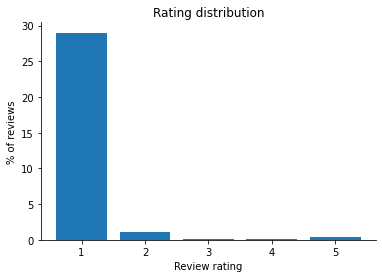

In [11]:
values, counts = np.unique(df['rating'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(values, normalized_counts * 100)
plt.xlabel('Review rating')
plt.ylabel('% of reviews')
sns.despine()
plt.title("Rating distribution")
plt.show()

In [13]:
# value counts + total # of reviews
print(f'Review rating count for dataset: \n\
.......\n\
{df["rating"].value_counts()}')

print(f'Total number of unique reviews for dataset: \n\
.......\n\
{df["rating"].value_counts().sum()}')

Review rating count for dataset: 
.......
1.0    1449
2.0      57
5.0      17
3.0       8
4.0       6
Name: rating, dtype: int64
Total number of unique reviews for dataset: 
.......
1537


In [15]:
# make new df with just 'rating' and 'text'

df = df[['rating', 'review']]
df.head(1)

rating                                             review
0     5.0  I had a last minute business trip from San Die...

In [16]:
# Binarize 
# 0 = ratings 1,2,3 (negative)
# 1 = ratings 4,5 (positive)

# mtl
df['rating'] = np.where(df['rating'] >= 4, 1, 0)
df

rating                                             review
0          1  I had a last minute business trip from San Die...
1          0  Had an issue with a car rental that we reserve...
2          1  I tried the multitude of travel places looking...
3          0  We rented a car through Priceline on a recent ...
4          1  I have found Priceline to be a good company. T...
...      ...                                                ...
4991       0   I bid on grocery items thru priceline.com.   ...
4992       0  I had requested a roundtrip ticket to Rapid Ci...
4993       0  They too charged me for ticket, and I told the...
4994       0  I have used the internet before to search for ...
4995       0  I searched about 5 different websites for airl...

[4996 rows x 2 columns]

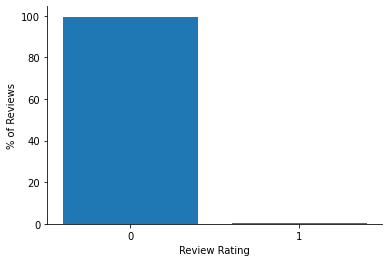

Class imbalance in dataset: [1. 0.]


In [17]:
# review rating distribution:

values, counts = np.unique(df['rating'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100) # plot normalized counts
plt.xlabel('Review Rating')
plt.ylabel('% of Reviews')
sns.despine()
plt.show()

print(f"Class imbalance in dataset: {np.round(normalized_counts, 2)}")

In [31]:
X = df['review']
y = df['rating']

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
df.dropna(inplace=True)

In [33]:
# 1. Instantiate 
bagofwords = CountVectorizer()

# 2. Fit 
bagofwords.fit(df["review"])

# 3. Transform
small_transformed = bagofwords.transform(df["review"])
small_transformed

<4835x10628 sparse matrix of type '<class 'numpy.int64'>'
	with 320646 stored elements in Compressed Sparse Row format>

In [34]:
# these are now the features, they are the individual tokens
bagofwords.get_feature_names()

['00',
 '000',
 '0022',
 '00am',
 '00pm',
 '01',
 '0100',
 '011',
 '0122',
 '01p',
 '02',
 '03',
 '04',
 '044',
 '0465',
 '05',
 '0575',
 '059',
 '05pm',
 '06',
 '060',
 '06355',
 '06854',
 '07',
 '0700',
 '08',
 '09',
 '0900',
 '10',
 '100',
 '1000',
 '1005',
 '1007',
 '101',
 '1017',
 '102',
 '1026',
 '103',
 '104',
 '105',
 '1052',
 '1059',
 '106',
 '107',
 '108',
 '109',
 '1092',
 '10am',
 '10days',
 '10m',
 '10min',
 '10pm',
 '10th',
 '10x',
 '11',
 '110',
 '1100',
 '1102',
 '111',
 '1116',
 '112',
 '1122',
 '1124',
 '113',
 '114',
 '1143',
 '115',
 '1150eu',
 '1153',
 '1159',
 '116',
 '117',
 '1170',
 '1178',
 '118',
 '119',
 '11am',
 '11pm',
 '11th',
 '12',
 '120',
 '1200',
 '121',
 '1210',
 '122',
 '123',
 '1230am',
 '1234',
 '124',
 '1244',
 '1245',
 '125',
 '1250',
 '1254',
 '126',
 '1260',
 '127',
 '128',
 '1280',
 '129',
 '12am',
 '12eur',
 '12hrs',
 '12th',
 '13',
 '130',
 '1300',
 '131',
 '132',
 '133',
 '1336',
 '134',
 '135',
 '136',
 '1362',
 '13629',
 '1368',
 '13697'

In [35]:
# converting the sparse matrix into a numpy array
small_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
my_df = pd.DataFrame(columns=bagofwords.get_feature_names(), data=small_transformed.toarray())
display(my_df)

00  000  0022  00am  00pm  01  0100  011  0122  01p  02  03  04  044  \
0      0    0     0     0     0   0     0    0     0    0   0   0   0    0   
1      0    0     0     0     0   0     0    0     0    0   0   0   0    0   
2      0    0     0     0     0   0     0    0     0    0   0   0   0    0   
3      0    0     0     0     0   0     0    0     0    0   0   0   0    0   
4      0    0     0     0     0   0     0    0     0    0   0   0   0    0   
...   ..  ...   ...   ...   ...  ..   ...  ...   ...  ...  ..  ..  ..  ...   
4830   0    0     0     0     0   0     0    0     0    0   0   0   0    0   
4831   1    0     0     0     0   0     0    0     0    0   0   0   0    0   
4832   0    0     0     0     0   0     0    0     0    0   0   0   0    0   
4833   0    0     0     0     0   0     0    0     0    0   0   0   0    0   
4834   0    0     0     0     0   0     0    0     0    0   0   0   0    0   

      0465  05  0575  059  05pm  06  060  06355  06854  07  0700  08  09  \
0        0   0     0    0     0   0    0      0      0   0     0   0   0   
1        0   0     0    0     0   0    0      0      0   0     0   0   0   
2        0   0     0    0     0   0    0      0      0   0     0   0   0   
3        0   0     0    0     0   0    0      0      0   0     0   0   0   
4        0   0     0    0     0   0    0      0      0   0     0   0   0   
...    ...  ..   ...  ...   ...  ..  ...    ...    ...  ..   ...  ..  ..   
4830     0   0     0    0     0   0    0      0      0   0     0   0   0   
4831     0   0     0    0     0   0    0      0      0   0     0   0   0   
4832     0   0     0    0     0   0    0      0      0   0     0   0   0   
4833     0   0     0    0     0   0    0      0      0   0     0   0   0   
4834     0   0     0    0     0   0    0      0      0   0     0   0   0   

      0900  10  100  1000  1005  1007  101  1017  102  1026  103  104  105  \
0        0   0    0     0     0     0    0     0    0     0    0    0    0   
1        0   0    0     0     0     0    0     0    0     0    0    0    0   
2        0   1    0     0     0     0    0     0    0     0    0    0    0   
3        0   0    0     0     0     0    0     0    0     0    0    0    0   
4        0   0    0     0     0     0    0     0    0     0    0    0    0   
...    ...  ..  ...   ...   ...   ...  ...   ...  ...   ...  ...  ...  ...   
4830     0   0    0     0     0     0    0     0    0     0    0    0    0   
4831     0   1    0     0     0     0    0     0    0     0    0    0    0   
4832     0   0    0     0     0     0    0     0    0     0    0    0    0   
4833     0   0    0     0     0     0    0     0    0     0    0    0    0   
4834     0   0    0     0     0     0    0     0    0     0    0    0    0   

      1052  1059  106  107  108  109  1092  10am  10days  10m  10min  10pm  \
0        0     0    0    0    0    0     0     0       0    0      0     0   
1        0     0    0    0    0    0     0     0       0    0      0     0   
2        0     0    0    0    0    0     0     0       0    0      0     0   
3        0     0    0    0    0    0     0     0       0    0      0     0   
4        0     0    0    0    0    0     0     0       0    0      0     0   
...    ...   ...  ...  ...  ...  ...   ...   ...     ...  ...    ...   ...   
4830     0     0    0    0    0    0     0     0       0    0      0     0   
4831     0     0    0    0    0    0     0     0       0    0      0     0   
4832     0     0    0    0    0    0     0     0       0    0      0     0   
4833     0     0    0    0    0    0     0     0       0    0      0     0   
4834     0     0    0    0    0    0     0     0       0    0      0     0   

      10th  10x  11  110  1100  1102  111  1116  112  1122  1124  113  114  \
0        0    0   0    0     0     0    0     0    0     0     0    0    0   
1        0    0   0    0     0     0    0     0    0     0     0    0    0   
2        0    0   0    0     0     0    0     0 

In [37]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
# size of training data
X_train.shape

(3239,)

In [39]:
# 1. Instantiate
bagofwords = CountVectorizer()

# 2. Fit
bagofwords.fit(X_train)

# 3. Transform
X_train_transformed = bagofwords.transform(X_train)
X_train_transformed

<3239x9097 sparse matrix of type '<class 'numpy.int64'>'
	with 215431 stored elements in Compressed Sparse Row format>

In [40]:
X_test_transformed = bagofwords.transform(X_test)
X_test_transformed

<1596x9097 sparse matrix of type '<class 'numpy.int64'>'
	with 103481 stored elements in Compressed Sparse Row format>

In [41]:
words = bagofwords.get_feature_names()
some_indices = range(1, 2051, round(2051/10)) # just pick some indices

samples = [words[i] for i in some_indices]
print(samples)

['000', '200x3', '3774', '770', 'adjusted', 'anatole', 'attempting', 'behalf', 'breaker', 'cardiff']


In [42]:
counts = np.array(X_train_transformed[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

000  200x3  3774  770  adjusted  anatole  attempting  \
total_corpus_count   21      1     1    1         6        1           9   

                    behalf  breaker  cardiff  
total_corpus_count       7        4        1

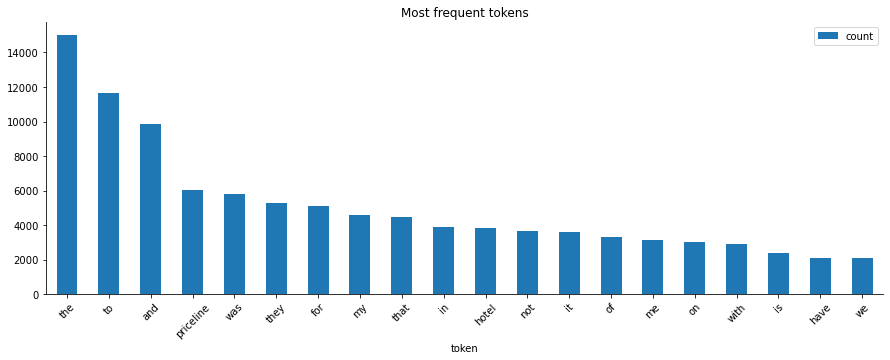

In [43]:
word_counts = X_train_transformed.toarray().sum(axis=0)

def plot_most_frequent(words, word_counts, top=20):
    words_df = pd.DataFrame({"token": words, 
                             "count": word_counts})
    
    fig, ax = plt.subplots(figsize=(0.75*top, 5))
    words_df.sort_values(by="count", ascending=False).head(top)\
        .set_index("token")\
        .plot(kind="bar", rot=45, ax=ax)
    sns.despine()
    plt.title("Most frequent tokens")
    plt.show()
    
plot_most_frequent(words, word_counts)

In [44]:
bagofwords = CountVectorizer(stop_words="english")
bagofwords.fit(X_train)

X_train_transformed = bagofwords.transform(X_train) 
X_test_transformed = bagofwords.transform(X_test) 

X_train_transformed.shape

(3239, 8815)

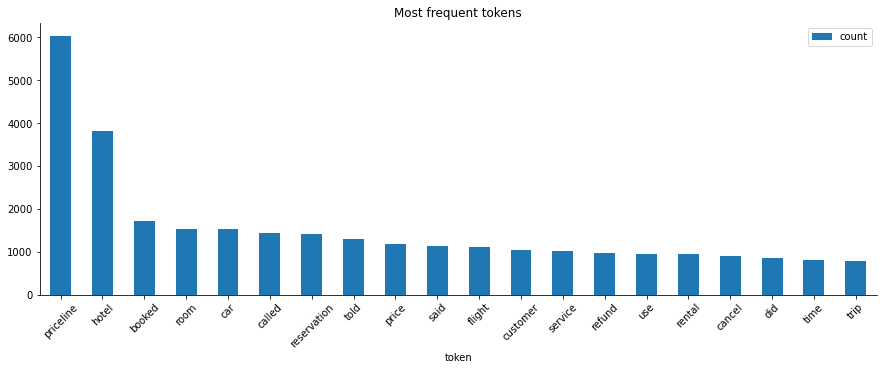

In [45]:
words = bagofwords.get_feature_names()
word_counts = X_train_transformed.toarray().sum(axis=0)

plot_most_frequent(words, word_counts)

In [46]:
# Fitting a model
logreg = LogisticRegression(C = 0.1)
logreg.fit(X_train_transformed, y_train)

# Training and test score
print(f"Train score: {logreg.score(X_train_transformed, y_train)}")
print(f"Test score: {logreg.score(X_test_transformed, y_test)}")

Train score: 0.9956776782957703
Test score: 0.9943609022556391


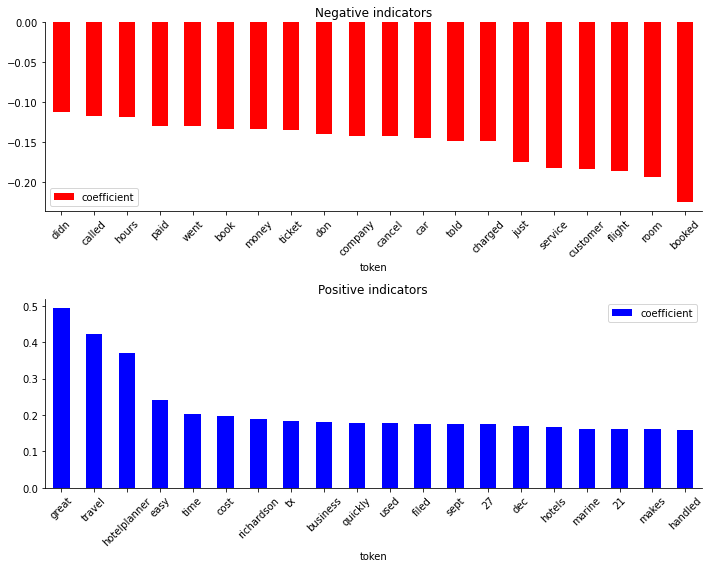

In [47]:
def plot_coefs(logreg, words):
    coef_df = pd.DataFrame({"coefficient": logreg.coef_[0], "token": words})
    coef_df = coef_df.sort_values("coefficient", ascending=False)

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # smallest coefficient -> tokens indicating negative sentiment 
    coef_df.tail(20).set_index("token").plot(kind="bar", rot=45, ax=axs[0], color="red")
    axs[0].set_title("Negative indicators")
 
    
    # largest coefficient -> tokens indicating positive sentiment 
    coef_df.head(20).set_index("token").plot(kind="bar", rot=45, ax=axs[1], color="blue")
    axs[1].set_title("Positive indicators")
    
    sns.despine()
    plt.tight_layout()
    plt.show()
    
plot_coefs(logreg, words)

In [50]:
topics = ['charge', 'flighthub', 'refund', 'bank']

def matcher(x):
    for i in topics:
        if i.lower() in x.lower():
            return i
    else:
        return np.nan
    
df['Match'] = df['review'].apply(matcher)

In [51]:
df['Match'].value_counts()

charge    1104
refund    1048
bank        49
Name: Match, dtype: int64